In [14]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 4.6MB/s 
     |████████████████████████████████| 40kB 6.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


## First model

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images' # download dataset and decompress 

def is_cat(x):
    return x[0].isupper()

# Tell fastai what the dataset is
# valid_pct: the percentage of data for validation set; default is 0.2 
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.198262,0.017031,0.006766,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.057690,0.010035,0.003383,00:51


In [ ]:
# call doc function to get the documentation of the func
doc(ImageDataLoaders.from_name_func)

In [ ]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
img

In [ ]:
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat? {is_cat}")
print(f"Probability it's a cat: {probs[1].item():.6f}")

## Deep Learning Jargon

- The functional form of the *model* is called its ***architecture*** (but be careful—sometimes people use model as a synonym of architecture, so this can get confusing).

- The weights are called ***parameters***.

- The predictions are calculated from the *independent* variable, which is the *data* NOT including the *labels*.

- The results of the model are called ***predictions***.

- The measure of performance is called the ***loss***.
    - The loss depends not only on the predictions, but also the correct labels (also known as targets or the dependent variable); e.g., "dog" or "cat."

## How Our Image Recgnizer Works

```python
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images' 

def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
```

The first line imports all of the `fastai.vision` library.

```python
from fastai.vision.all import *
```

The second line downloads a standard dataset from the `fast.ai` datasets collection (if not previously downloaded) to our server, extracts it (if not previously extracted), and returns a Path object with the extracted location

```python
path = untar_data(URLs.PETS)/'images'
```

Then we define a function `is_cat(()`, labels cats based on a filename rule provided by the dataset creators:

```python
def is_cat(x):
    return x[0].isupper()
```

This function is used in the following code, which tells fastai what kind of dataset we have, and how it is structured:

```python
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)
```

- There are various different classes for different kinds of deep learning datasets and problems—here we're using `ImageDataLoaders`.

- Another important piece of information that we have to tell fastai is how to get the labels from the dataset. Computer vision datasets are normally structured in such a way that the label for an image is part of the filename, or path—most commonly the parent folder name. Here we're telling fastai to use the `is_cat` function we just defined.

- Finally, we define the `Transform`s that we need. A `Transform` contains code that is applied automatically during training
    - `item_tfms` are applied to each item (in this case, each item is resized to a 224-pixel square)
    - `batch_tfms` are applied to a batch of items at a time using the GPU, so they're particularly fast

> ### Classification and Regression
- Classification: attempts to predict a class, or category. I.e., predict from a number of **discrete** possibilities, such as "dog" or "cat".
- Regression: attempts to predict one or more numeric quantities, such as temperature, or a location.

- The most important parameter to mention here is `valid_pct=0.2`.
    - This tells fastai to hold out 20% of the data and not use it for training the model at all. This 20% of the data is called the **validation set**; the remaining 80% is called the **training set**.
    - The validation set is used to measure the accuracy of the model.
        - By default, the 20% that is held out is selected randomly.
        - The parameter `seed=42` sets the random seed to the same value every time we run this code, which means we get the same validation set every time we run it—this way, if we change our model and retrain it, we know that any differences are due to the changes to the model, not due to having a different random validation set.
    - Remember: **When we train a model, we must always have both a training set and a validation set, and must measure the accuracy of our model only on the validation set!!!**

> ### Overfitting
If you train for too long, with not enough data, you will see the accuracy of your model start to get worse; this is called **overfitting**.

The second last line of the code training our image recognizer tells fastai to create a convolutional neural network (CNN) and specifies what architecture to use (i.e. what kind of model to create), what data we want to train it on, and what metric to use:

```python
learn = cnn_learner(dls, resnet34, metrics=error_rate)
```
- Picking an architecture isn' a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something we need to spend much time on.

- Here we use `resnet34`
    - ResNet is both fast and accurate for many datasets and problem
    - `34` refers to the number of layers in this variant of the architecture (other options are `18`, `50`, `101`, and `152`). 
    - Notice that models using architectures with more layers take longer to train, and are more prone to overfitting

- We use `error_rate` as the metric
> A **metric** is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each epoch.
> - **Error rate**: percentage of images in the validation set are being classified incorrectly
> - **accuracy**: = 1.0 - error rate

- `cnn_learner` also has a parameter `pretrained`, which defaults to `True`
    - `pretrained=True` sets the weights in our model to values that have already been trained by experts to recognize a thousand different categories across 1.3 million photos (using the famous ImageNet dataset)
    > A model that has weights that have already been trained on some other dataset is called a **pretrained model**
    > We should nearly ALWAYS use a pretrained model, because it means that our model, before we've even shown it any of your data, is already very capable. And, in a deep learning model many of these capabilities are things we'll need, almost regardless of the details of our project.
    - When using a pretrained model, `cnn_learner` will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset we are working with. This last part of the model is known as the **head**.

> ### Transfer Learning
> Using a pretrained model for a task different to what it was originally trained for. 
> Using pretrained models is the most important method we have to allow us to train more accurate models, more quickly, with less data, and less time and money!

The last line of our code tells fastai how to *fit* the model

```python
learn.fine_tune(1)
```

- The architecture only describes a template for a mathematical function; it does NOT actually do anything until we provide values for the millions of parameters it contains.

- Key to deep learning: determining how to fit the parameters of a model to get it to solve our problem. In order to fit a model, we have to provide at least one piece of information: how many times to look at each image (known as number of **epochs**).
    > ### Epoch
    > One complete pass through the dataset
    
    - The number of epochs we select will largely depend on how much time we have available, and how long we find it takes in practice to fit our model. If we select a number that is too small, we can always train for more epochs later.

- As we've started with a pretrained model, we just need to fine-tune this pretrained model
> ### Fine-tuning
> A transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

    The default form of fine-tuning does two steps
    1. Use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with our dataset.
    2. Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which, as we'll see, generally don't require many changes from the pretrained weights).

























## Segmentation

Creating a model that can recognize the content of every individual pixel in an image.

In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.734375,10.334885,00:03


epoch,train_loss,valid_loss,time
0,2.691265,2.144803,00:01
1,2.175272,1.734503,00:01
2,1.879186,1.276483,00:01
3,1.654287,1.092671,00:01
4,1.471566,0.957454,00:01
5,1.321741,0.842282,00:01
6,1.202878,0.811139,00:01
7,1.101653,0.808441,00:01


We can visualize how well it achieved its task, by asking the model to color-code each pixel of an image.

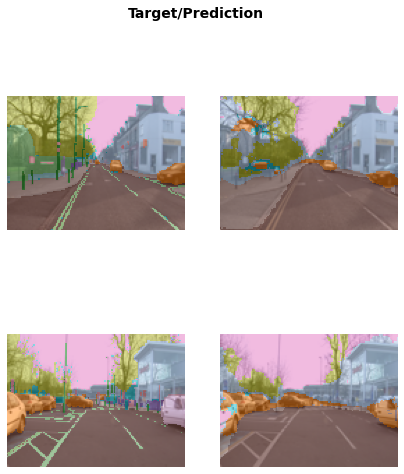

In [5]:
learn.show_results(max_n=6, figsize=(7,8))